In [4]:
import numpy as np
from get_periodic_orbits import make_broucke_path, plot_orbit, plot_orbit_and_approx
from torus_rep import get_irreps, construct_orbit, plot_results, reorder_dataset

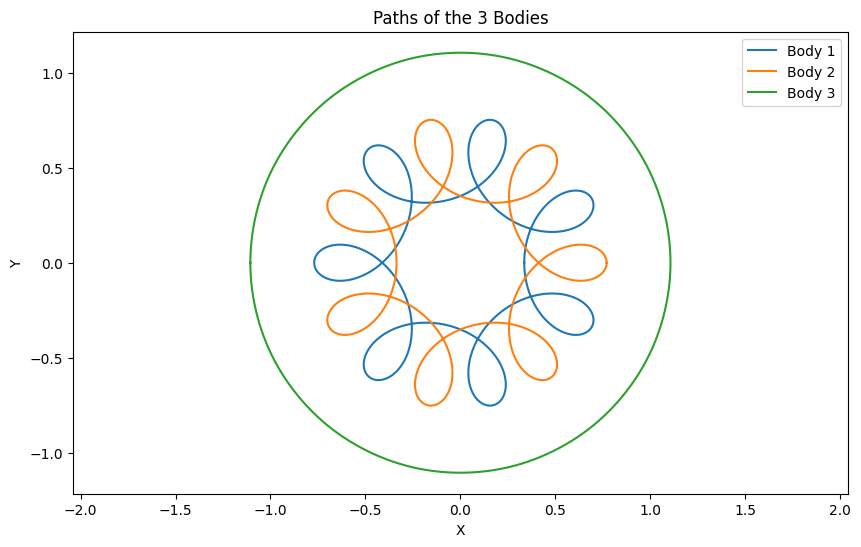

In [5]:
X = make_broucke_path('A2')
plot_orbit(X)

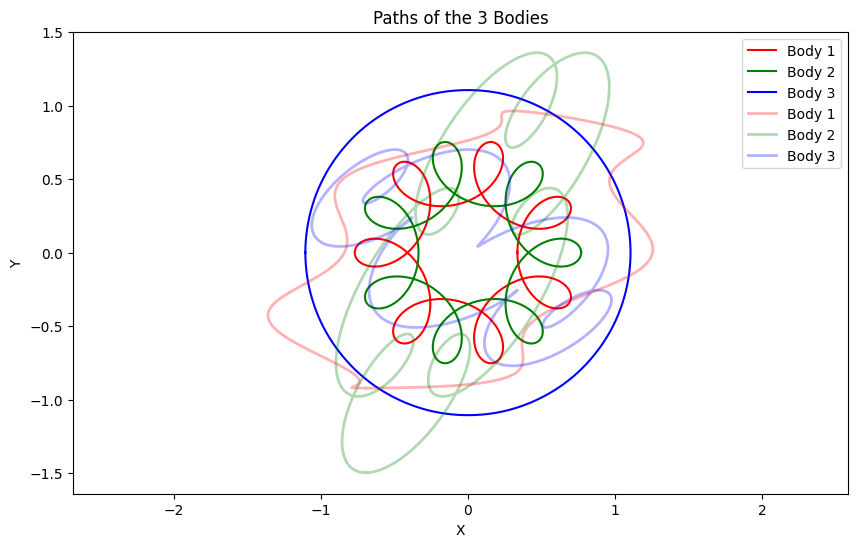

In [6]:
# X = reorder_dataset(X)
P = get_irreps(X)
x_start = X[:, 0]
x_approx = construct_orbit(P, x_start, num_points=X.shape[1]).real
np.linalg.norm(x_approx.imag)
# plot_results(X.T, x_approx.T, projection='pca')
plot_orbit_and_approx(X, x_approx)